## 2장. 퍼셉트론(perceptron)

퍼셉트론이란

### __퍼셉트론 ? 인간의 뇌세포 하나를 컴퓨터로 구현한것__ 

1957년에 프랑크 로젠 블라트가 퍼셉트론 알고리즘을 고안했다.  
사람의 뇌의 동작을 전기 스위치 온/오프로 흉내 낼 수 있다는 이론을 증명하였다.


간단히 말하면 인간의 신경세포 하나를 흉내를 냈는데 고등학교 생물시간에 배운 3가지 용어?

1. 자극(stimulus)
2. 반응(response)
3. 역치(theshold)

" 특정 __자극__이 있다면 그 자극이 __어느 역치 이상__이여야하지만 세포가 반응한다."

__예 :__ 짜게 먹는 사람은 자기가 평소에 먹는 만큼 음식이 짜지 않으면 싱겁다고 느낀다.( 역치 이하의 자극은 무시함.)

## ■ 2. 단순한 논리회로

AND 게이트 퍼셉트론을 구현하는 방법

그림 2-2

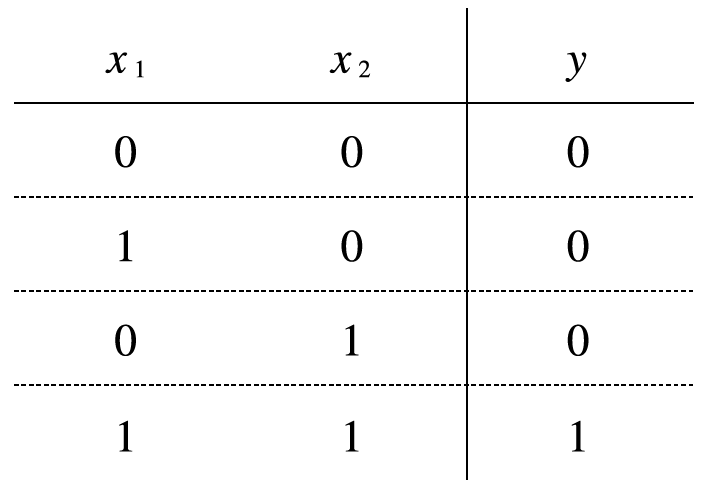

In [ ]:
# 입력값

inputs = np.array([[0,0], [0,1], [1,0],[1,1]])

#가중치

w = np.array([0.4],[0.35],[0.05])

# target(결과)

target = np.array([0],[0],[0],[1])

## 문제14. 위의 inputs, w, target의 shape를 확인하시오!

In [9]:
import numpy as np

#입력값
inputs = np.array([[0,0], [0,1], [1,0], [1,1]])

#가중치
w = np.array([[0.4],[0.35],[0.05]])

# target(결과)

target = np.array([[0],[0],[0],[1]])

print(inputs.shape) #(4,2)
print(w.shape) #(3,1)
print(target.shape) #(4,1)

(4, 2)
(3, 1)
(4, 1)


## 문제15. and 게이트 퍼셉트론 함수를 생성하시오!

In [7]:
def AND(x1,x2):
    w1, w2, theta = 0.5, 0.5, 0.7 # theta = 세타
    tmp = x1*w1 + x2*w2
    if tmp <= theta:
        return 0
    if tmp > theta:
        return 1

print(AND(0,0))
print(AND(1,0))
print(AND(0,1))
print(AND(1,1))

0
0
0
1


## 문제16. OR게이트 퍼셉트론 함수를 생성하시오!

In [13]:
def OR(x1,x2):
    w1, w2, theta = 0.5, 0.5, 0.3
    tmp = x1*w1 + x2*w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

print(OR(0,0))
print(OR(1,0))
print(OR(0,1))
print(OR(1,1))

0
1
1
1


## 가중치와 편향의 도입

w1, w2, theta = 0.5, 0.5, 0.3

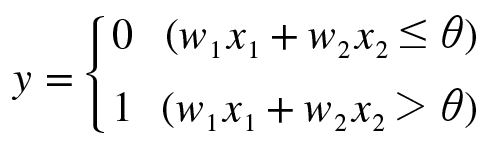

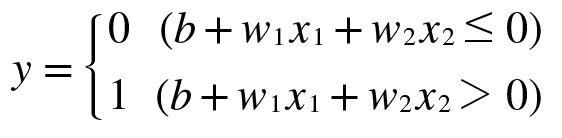

현재 식2.1과 식2.2는 기호표기만 다를뿐 그 의미는 같습니다.  
여기에서 b를 편향(bias)라고 하며 w1과 w2는 가중치 입니다.  
__퍼셉트론__은 입력신호에 가중치를 곱한 값과 편향을 합하여,  
그 값이 0을 넘으면 1을 출력하고 그렇지 않으면 0을 출력합니다.

__딥려닝 면접 문제1__  : 신경망에서 편향이 왜 필요한가요?

__편향(bias)__ 은 뉴런이 얼마나 쉽게 활성화 하느냐를 조정하는 매개변수 입니다.  
만약, and 게이트처럼 입력신호(x1과 x2)가 w1과 w2값을 받는 경우에 편향(x0 값이)이 없다면 target을 분류하는 직선은 무조건 원점을 통과해야만 한다.  
때문에, 분류를 제대로 할 수 없게 됩니다.

__딥러닝 면접 문제2__ : 가중치(w)는 무엇인가요?

__가중치__는 각 입력신호가 결과에 주는 영향력(중요도)를 조절하는 매개변수입니다.  
ex) 고양이의 귀가 얼마나 중요하냐? 중요하면 가중치가 커진다.  

## 문제17. NAND 게이트 함수를 생성하시오.

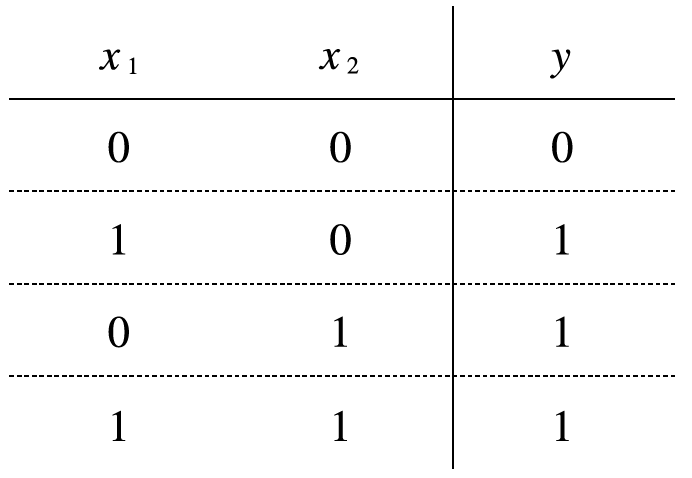

In [20]:
# AND 코딩한거에다가 w1,w2,theta 다 마이너스 붙여버리면됨.

def NAND(x1,x2):
    w1, w2, theta = - 0.5, - 0.5, -0.7
    tmp = x1*w1 + x2*w2 # tmp값을 0으로 설정한 상황이 아님.
    if tmp <= theta:
        return 0
    
    elif tmp > theta:
        return 1

print(NAND(0,0)) # 1
print(NAND(1,0)) # 1
print(NAND(0,1)) # 1
print(NAND(1,1)) # 0

1
1
1
0


## 문제18. 위의 NAND게이트 함수에 편향(b)을 넣으시오!

In [1]:
# 이 방법을 더 많이 쓰므로 이방법을 추천함.
def NAND(x1,x2):
    import numpy as np
    x = np.array([x1,x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    
    tmp = np.sum(x*w) + b # tmp는 0으로 설정한 상황. 따라서, b(편향)값은 + 값으로 주었음.
    
    if tmp <= 0:
        return 0
    
    else:
        return 1

print(NAND(0,0)) # 1
print(NAND(1,0)) # 1
print(NAND(0,1)) # 1
print(NAND(1,1)) # 0

1
1
1
0


## 문제19. AND 게이트 퍼셉트론 함수도 위와 같이 편향을 주어서 만드시오!

In [24]:
def AND(x1,x2):
    import numpy as np
    x = np.array([x1,x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    
    tmp = np.sum(x*w) + b # tmp는 0으로 설정한 상황. 따라서, b(편향)값은 (-)값으로 주었음.
    
    if tmp <= 0:
        return 0
    
    else:
        return 1



print(AND(0,0)) # 0
print(AND(1,0)) # 0
print(AND(0,1)) # 0
print(AND(1,1)) # 1

0
0
0
1


## 문제20. 위와 같이 편향을 넣어서 OR게이트 함수를 만드시오!

In [2]:
def OR(x1,x2):
    import numpy as np
    x = np.array([x1,x2])
    w = np.array([0.5, 0.5])
    b =  - 0.3
    
    tmp = np.sum(x*w) + b 
    
    if tmp <= 0:
        return 0
    
    else:
        return 1

# Tip.
# 0 <= x1,x2 <=1 (0에서 1사이의 값)
# b는 자유 값
# 어쨌든 결과값만 제대로 나오면 됨.
# 변수들의 값만 바꿀 것, 코드는 변경하지 말 것(ex. return 값)

print(OR(0,0)) # 0
print(OR(1,0)) # 1
print(OR(0,1)) # 1
print(OR(1,1)) # 1

0
1
1
1


## 문제21. (점심시간 문제) XOR게이트 함수를 생성하시오!
## 앞에서 만들었던 AND, OR, NAND 함수를 사용해서 만드시오!

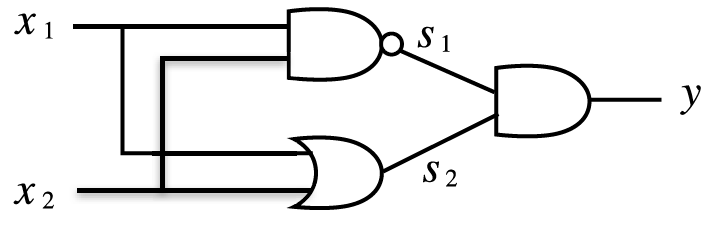

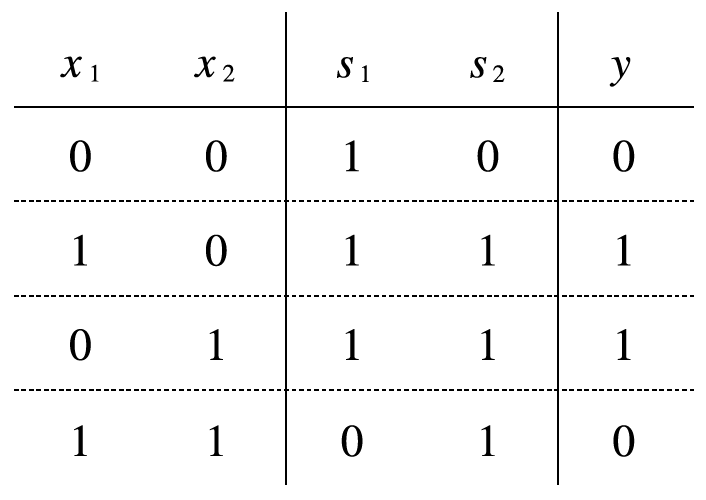

In [ ]:
def NAND(x1,x2):
    import numpy as np
    x = np.array([x1,x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    
    tmp = np.sum(x*w) + b # tmp는 0으로 설정한 상황. 따라서, b(편향)값은 +값으로 주었음.
    
    if tmp <= 0:
        return 0
    
    else:
        return 1


def OR(x1,x2):
    import numpy as np
    x = np.array([x1,x2])
    w = np.array([0.5, 0.5])
    b =  - 0.3
    
    tmp = np.sum(x*w) + b 
    
    if tmp <= 0:
        return 0
    
    else:
        return 1
    
def AND(x1,x2):
    import numpy as np
    x = np.array([x1,x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    
    tmp = np.sum(x*w) + b # tmp는 0으로 설정한 상황. 따라서, b(편향)값은 (-)값으로 주었음.
    
    if tmp <= 0:
        return 0
    
    else:
        return 1  
    
def XOR(x1, x2) :
    return AND(NAND(x1, x2), OR(x1, x2))

print(XOR(0, 0))
print(XOR(0, 1))
print(XOR(1, 0))
print(XOR(1, 1))

## 4개의 퍼셉트론이 분류하는 그림 4개

1. __AND 게이트__ : 분류 하는 선이 직선
2. __OR 게이트__ : 분류 하는 선이 직선
3. __NAND 게이트__ : 분류 하는 선이 직선
4. __XOR 게이트__ : 분류를 하는 직선 즉 선형이 아니라, __곡선(비선형)__이다.

## 파이썬 numpy 를 이용해서 퍼셉트론의 가중치와 편향을 컴퓨터가 알아내는 코드구현 


" 행렬 연산은 numpy를 이용해야 구현이 쉽다."  
" 파이썬의 리스트로 행렬 연산을 하지 않고 반드시 numpy array 로 변환해서 연산을 수행해야 코드가 심플해지고 구현이 쉽다."  

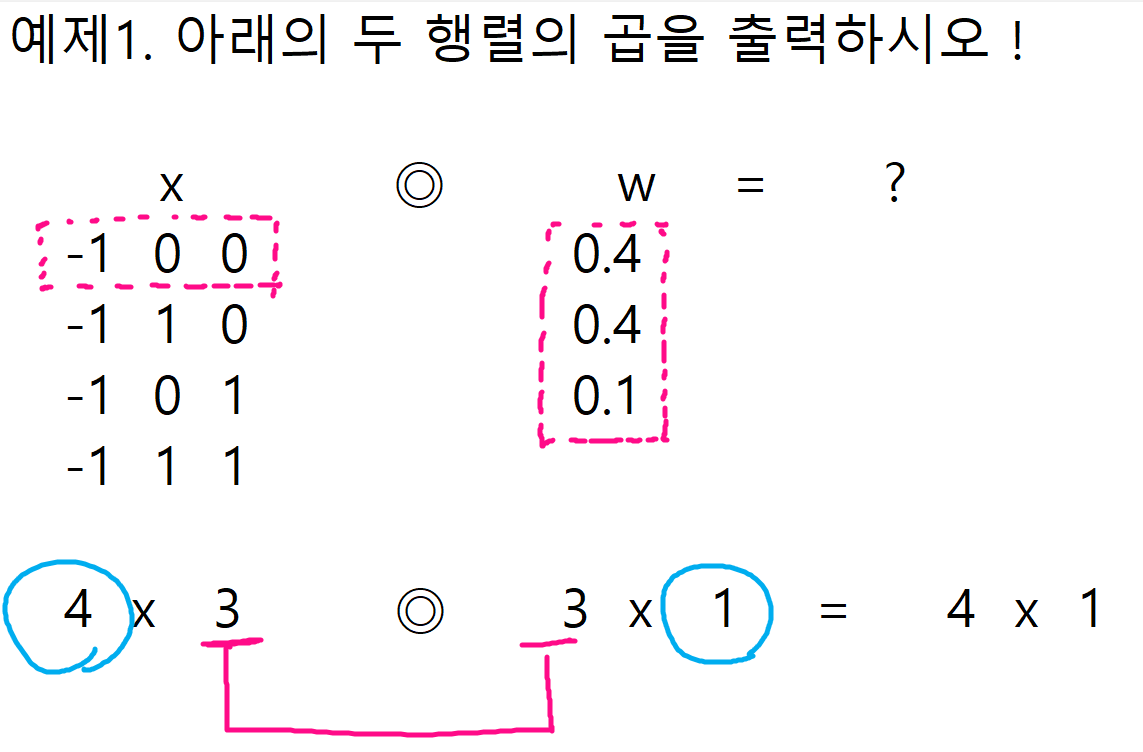

In [32]:
import numpy as np

x = np.array([[-1,0,0],[-1,1,0],[-1,0,1],[-1,1,1]]) # 4x3 행렬
w = np.array([[0.4],[0.4],[0.1]]) # 3x1 행렬

result = np.dot(x,w) # 4x1 행렬

print(result)

# result = x@w 도 가능하다. ( @가 np.dot() 기능과 같다 )

[[-0.4]
 [ 0. ]
 [-0.3]
 [ 0.1]]


In [75]:
import numpy as np

x = np.array([[-1,0,0],[-1,1,0],[-1,0,1],[-1,1,1]]) # 4x3 행렬
w = np.array([[0.4],[0.4],[0.1]]) # 3x1 행렬


result = x@w

print(result)

[[-0.4]
 [ 0. ]
 [-0.3]
 [ 0.1]]


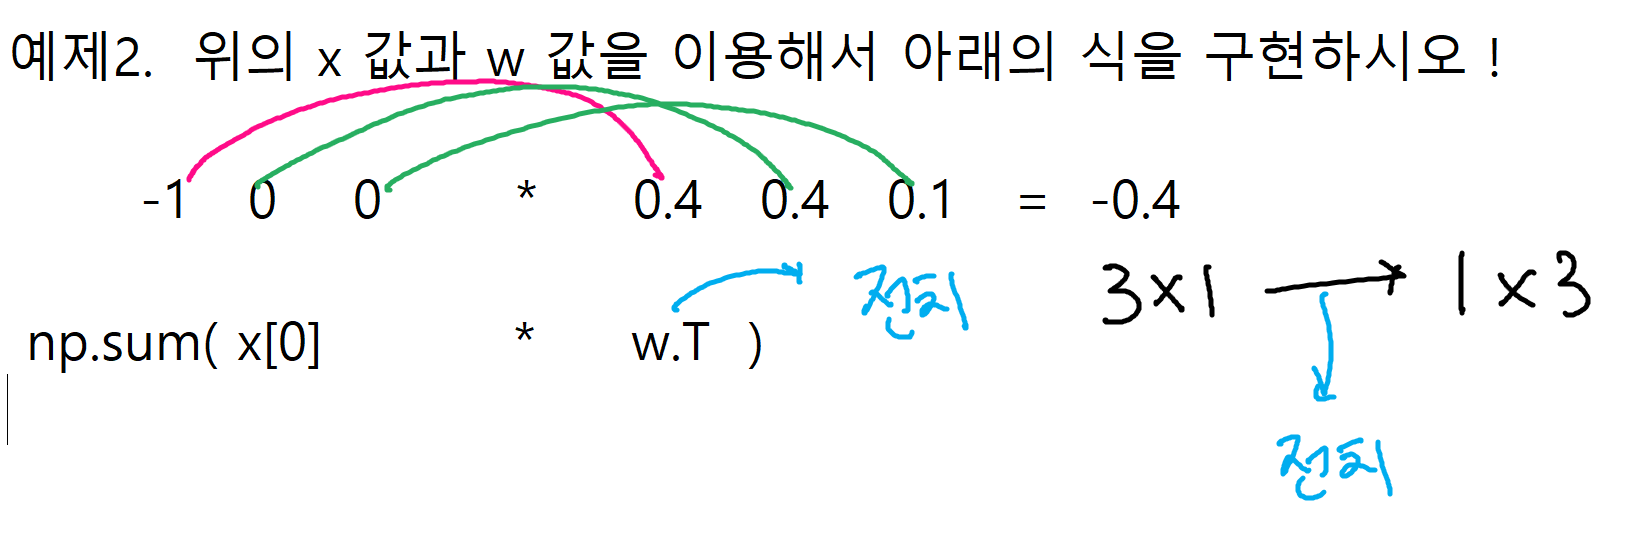

In [82]:
import numpy as np

x = np.array([[-1,-1,0]]) # 1x3 행렬

w = np.array([[0.4],[0.4],[0.1]]) # 3x1 행렬

print(w.T) # w.T는 1x3행렬

result = np.sum(x[0] * w.T)
result2 = np.sum(x * w.T)

print(result)
print(result2)

[[0.4 0.4 0.1]]
0.0
0.0


### ※ 위의코드는 내적과 같지만 이렇게 표현하는 방법도 있다는 것을 보여줌.

## 예제3. 위의 식을 이용해서 predict 함수를 아래와 같이 생성하시오

In [ ]:
def predict(x,w):
    a = np.sum(x*w.T)
    return a

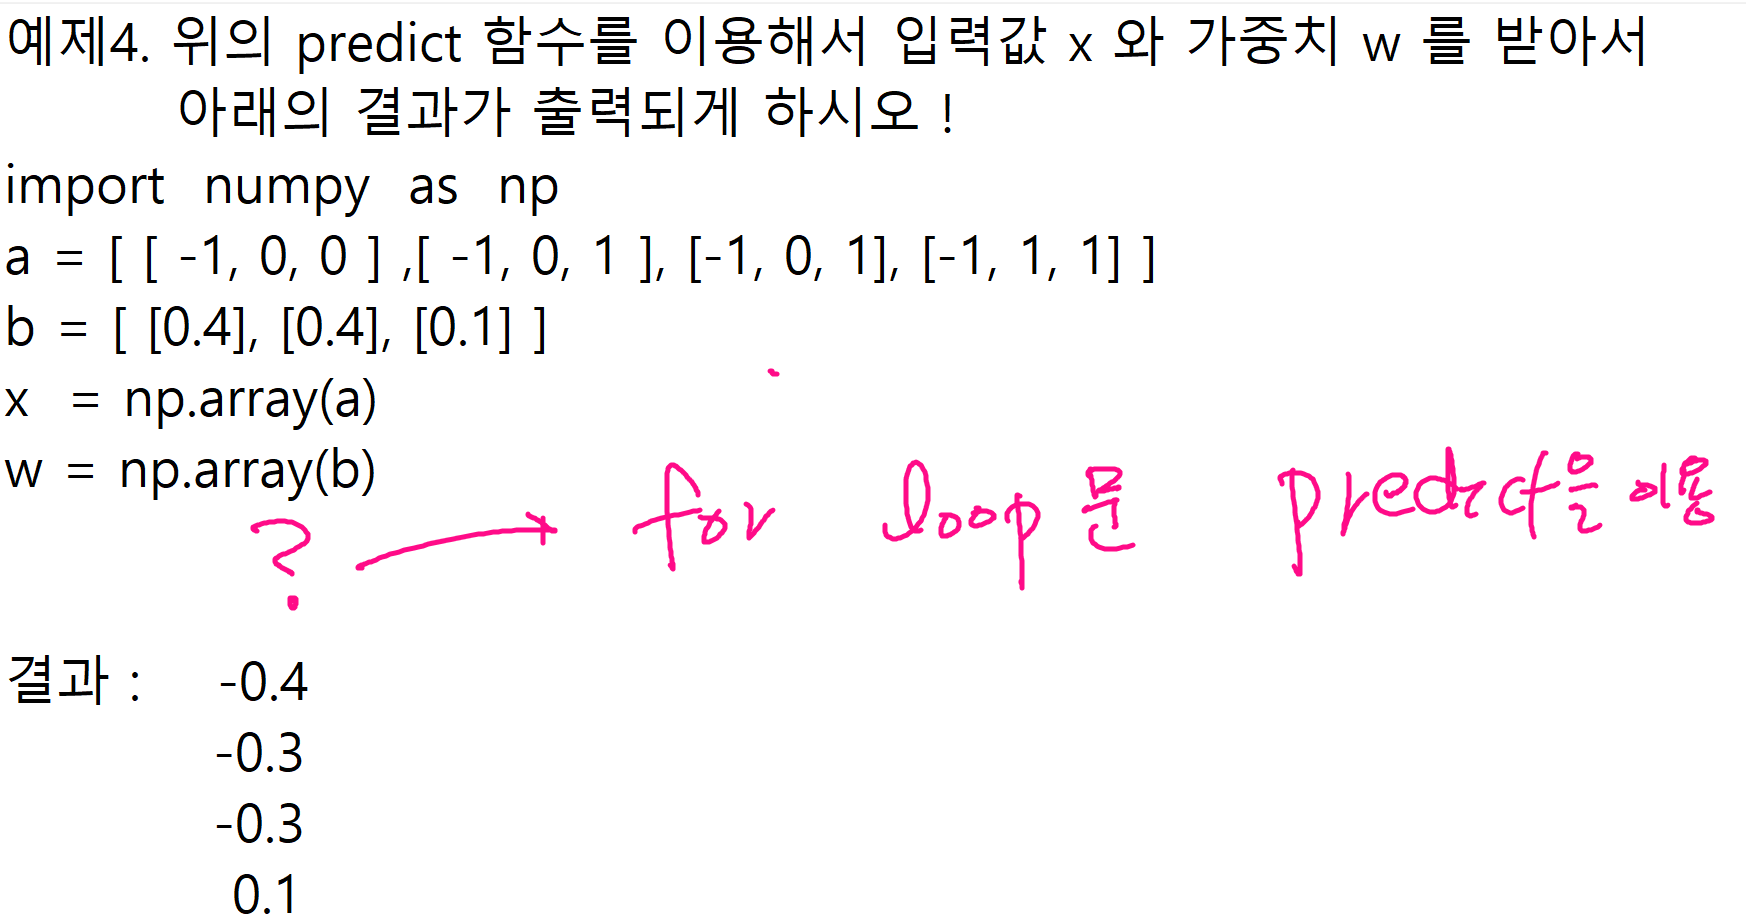

In [2]:
# x와 w곱의 합까지 포현된 ver.

import numpy as np

def predict(x,w):
    a = np.sum(x*w.T) # x와 T의 열의 수가 같아야 곱을 진행할 수 있다. (따라서 w.T로 전치시킴)
    return a

x = np.array([[-1,0,0],[-1,1,0],[-1,0,1],[-1,1,1]]) # 4x3 행렬
w = np.array([[0.4],[0.4],[0.1]]) # 3x1 행렬

for i in range(4):
    print(predict(x[i],w)) # 부분

print(predict(x,w)) # 전체

-0.4
0.0
-0.30000000000000004
0.1
-0.6000000000000001


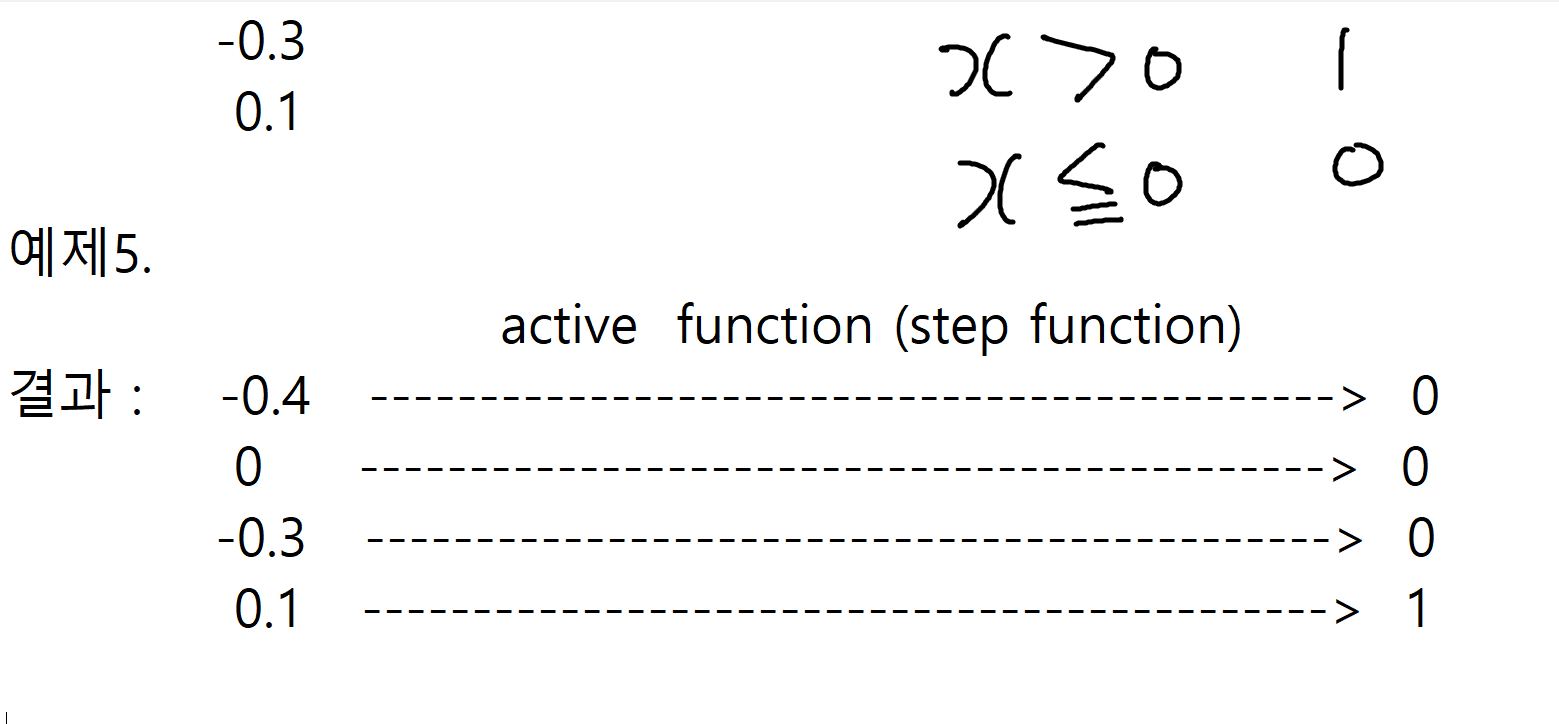

In [71]:
print(-0.4 > 0)
print (0.1 > 0)

x = np.array(-0.4 > 0, dtype = np.int) # array(0)으로 출력됨.
y = np.array(0.1 > 0, dtype = np.int) # array(1)로 출력됨.

print (x)
print(y)

False
True
0
1


In [72]:
def step_function(x):
    y = np.array(x > 0) # y의 값은 True or False로 나오는 상황
    return y.astype(np.int) # y의 값을 np.int의 형태로 바꾸어라

print(step_function(-0.4))

0


In [85]:
# step function까지 추가한 ver

import numpy as np

x = np.array([[-1,0,0],[-1,1,0],[-1,0,1],[-1,1,1]]) # 4x3 행렬
w = np.array([[0.4],[0.4],[0.1]]) # 3x1 행렬

def step_function(x):
    y = np.array(x > 0)
    return y.astype(np.int)

# predict 함수는 비교하자면 내적과 같다.
# predict 함수에 추가적으로 step_funciton을 적용함.

def predict(x,w):
    a = np.sum(x*w.T)
    return step_function(a)


for i in range(4):
    print(predict(x[i],w))

0
0
0
1


## 예제6. 위의 예측값과 실제 타겟값과의 차이를 출력하는 코드를 완성하시오.

In [ ]:
import numpy as np

target = np.array([[0],[0],[0],[1]])

for i in range(len(target)):
    cost = target[i] - predict(x[i],w)
    print(cost)

In [87]:
# 예측값과 실제 타겟값의 차이까지 추가한 ver

import numpy as np

x = np.array([[-1,0,0],[-1,1,0],[-1,0,1],[-1,1,1]]) # 4x3 행렬
w = np.array([[0.3],[0.4],[0.1]]) # 3x1 행렬
target = np.array([[0],[0],[0],[1]])

def step_function(x):
    y = np.array(x > 0)
    return y.astype(np.int)

# predict 함수는 비교하자면 내적과 같다.
# predict 함수에 추가적으로 step_funciton을 적용함.
def predict(x,w):
    a = np.sum(x*w.T)
    return step_function(a)


for i in range(len(target)):
    cost = target[i] - predict(x[i],w)
    print(cost)

[0]
[-1]
[0]
[0]


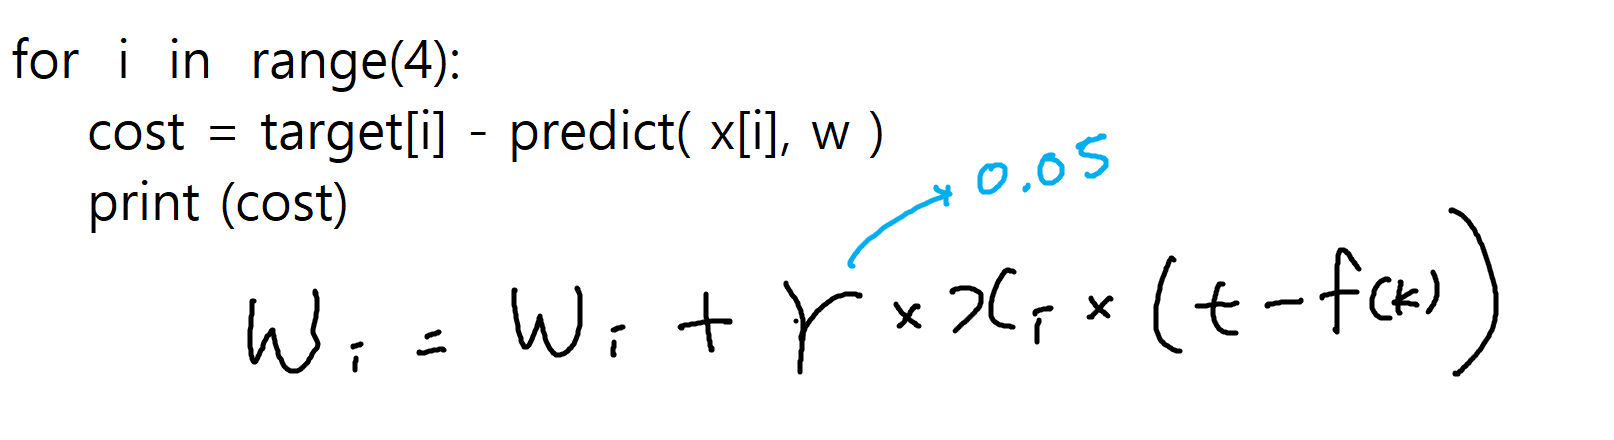

In [ ]:
# wi = wi + r * xi * (t- f(x)) 까지 표현함.

import numpy as np

x = np.array([[-1,0,0],[-1,1,0],[-1,0,1],[-1,1,1]]) # 4x3 행렬
w = np.array([[0.3],[0.4],[0.1]]) # 3x1 행렬
target = np.array([[0],[0],[0],[1]])

def step_function(x):
    y = np.array(x > 0)
    return y.astype(np.int)

# predict 함수는 비교하자면 내적과 같다.
# predict 함수에 추가적으로 step_funciton을 적용함.

def predict(x,w):
    a = np.sum(x*w.T)
    return step_function(a)



for i in range(len(target)):
    cost = target[i] - predict(x[i],w)
    print(w.shape) # 3x1 행렬
    print(np.array([0.05 * x[i] * cost]).shape) # 1x3 행렬 ( 따라서 전치를 안하면 더할수가 없는 상황)
    w = w + np.array([0.05 * x[i] * cost]).T # 3x1 행렬 + 3x1 행렬
    print(w) # 각 입력에 대한 가중치 w0, w1, w2 을 구하는 과정.

In [3]:
# AND게이트 퍼셉트론 구현 ver.

import numpy as np

x = np.array([[-1,0,0],[-1,1,0],[-1,0,1],[-1,1,1]]) # 4x3 행렬
w = np.array([[0.3],[0.4],[0.1]]) # 3x1 행렬
target = np.array([[0],[0],[0],[1]])

def step_function(x):
    y = np.array(x > 0)
    return y.astype(np.int)

# predict 함수는 비교하자면 내적과 같다.
# predict 함수에 추가적으로 step_funciton을 적용함.

def predict(x,w):
    a = np.sum(x*w.T)
    return step_function(a)


for j in range(4):
    for i in range(len(target)):
        cost = target[i] - predict(x[i],w)
        w = w + np.array([0.05 * x[i] * cost]).T 
    print(w)

[[0.35]
 [0.35]
 [0.1 ]]
[[0.4]
 [0.3]
 [0.1]]
[[0.4]
 [0.3]
 [0.1]]
[[0.4]
 [0.3]
 [0.1]]


## 문제22. 위의 코드가 같은 가중치 값을 2번이상 출력하면 break 되게 코드를 수정하시오.

In [99]:
# 최종 AND게이트 퍼셉트론 구현 ver.

import numpy as np
import copy

x = np.array([[-1,0,0],[-1,1,0],[-1,0,1],[-1,1,1]]) # 4x3 행렬
w = np.array([[0.3],[0.4],[0.1]]) # 3x1 행렬
target = np.array([[0],[0],[0],[1]])

def step_function(x):
    y = np.array(x > 0)
    return y.astype(np.int)

# predict 함수는 비교하자면 내적과 같다.
# predict 함수에 추가적으로 step_funciton을 적용함.

def predict(x,w):
    a = np.sum(x*w.T)
    return step_function(a)



while True:
    temp1 = copy.deepcopy(w)
    for i in range(len(target)):
        cost = target[i] - predict(x[i],w)
        w = w + np.array([0.05 * x[i] * cost]).T 
    
    temp2 = w
    if list(temp1) == list(temp2): # numpy끼리는 == 으로 비교가 불가능해서, list로 타입을 변경해서 비교함
        break
print(w)

[[0.4]
 [0.3]
 [0.1]]


## Tip. 분류하는 직선의 방정식을 그래프로 표현하는 방법.

[-2.         -1.91836735 -1.83673469 -1.75510204 -1.67346939 -1.59183673
 -1.51020408 -1.42857143 -1.34693878 -1.26530612 -1.18367347 -1.10204082
 -1.02040816 -0.93877551 -0.85714286 -0.7755102  -0.69387755 -0.6122449
 -0.53061224 -0.44897959 -0.36734694 -0.28571429 -0.20408163 -0.12244898
 -0.04081633  0.04081633  0.12244898  0.20408163  0.28571429  0.36734694
  0.44897959  0.53061224  0.6122449   0.69387755  0.7755102   0.85714286
  0.93877551  1.02040816  1.10204082  1.18367347  1.26530612  1.34693878
  1.42857143  1.51020408  1.59183673  1.67346939  1.75510204  1.83673469
  1.91836735  2.        ]


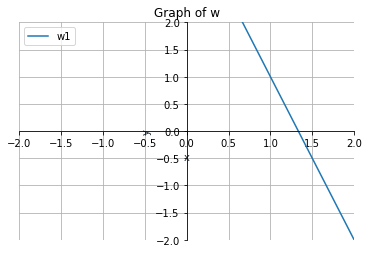

In [5]:
# -*- coding: utf-8 -*-
"""
Created on Tue Dec 17 16:13:08 2019

@author: wdp
"""

import numpy as np
a = [ [-1, 0, 0], [-1, 1, 0], [-1, 0, 1], [-1, 1, 1] ] 
b = [ [0.3], [0.4], [0.1] ] 
x = np.array(a)
w = np.array(b)
target = np.array( [ [0], [0], [0], [1] ] )

def step_function(x):
    y = np.array(x > 0)
    return y.astype(np.int)

# predict 함수는 비교하자면 내적과 같다.
# predict 함수에 추가적으로 step_funciton을 적용함.

def predict(x,w):
    a = np.sum(x*w.T)
    return step_function(a)



while True:
    import copy
    temp1 = copy.deepcopy(w)
    for i in range(len(target)):
        cost = target[i] - predict(x[i],w)
        w = w + np.array([0.05 * x[i] * cost]).T 
    
    temp2 = w
    if list(temp1) == list(temp2): # numpy끼리는 == 으로 비교가 불가능해서, list로 타입을 변경해서 비교함
        break
        

# 분류하는 직선의 방정식 그래프로 그리는 부분
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-2,2,50) # -2에서 2까지 50등분해서 numpy행태로 나타내겠다.
print(x)

y = -(x*w[1]/w[2]) + (w[0]/w[2]) #최종 가중치의 직선의 방정식

fig = plt.figure() # 그림그리는 바탕을 fig로 만들겠다.
ax = fig.add_subplot(1, 1, 1)  #(2,2,2) 로 바꾸어서 해본다.

ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none') # right부분의 선을 없애버림.
ax.spines['top'].set_color('none') # top부분의 선을 없애버림.
ax.xaxis.set_ticks_position('bottom') # bottom 부분의 눈금을 없앰.
ax.yaxis.set_ticks_position('left') # left 부분의 눈금을 없앰.

plt.plot(x, y, label='w1')

plt.xlim(-2, 2) # x축의 눈금숫자의 시작과 마지막
plt.ylim(-2, 2) # y축의 눈금숫자의 시작과 마지막
plt.title('Graph of w') # 제목
plt.xlabel('x', color='#1C2833') # x축의 라벨 색깔
plt.ylabel('y', color='#1C2833') # y축의 라벨 색깔
plt.legend(loc='upper left') # 레전드가 위에 왼쪽에 나오게 하라
plt.grid() # 격자 모양 출력
plt.show() # 결과 보여줘

[-2.         -1.91836735 -1.83673469 -1.75510204 -1.67346939 -1.59183673
 -1.51020408 -1.42857143 -1.34693878 -1.26530612 -1.18367347 -1.10204082
 -1.02040816 -0.93877551 -0.85714286 -0.7755102  -0.69387755 -0.6122449
 -0.53061224 -0.44897959 -0.36734694 -0.28571429 -0.20408163 -0.12244898
 -0.04081633  0.04081633  0.12244898  0.20408163  0.28571429  0.36734694
  0.44897959  0.53061224  0.6122449   0.69387755  0.7755102   0.85714286
  0.93877551  1.02040816  1.10204082  1.18367347  1.26530612  1.34693878
  1.42857143  1.51020408  1.59183673  1.67346939  1.75510204  1.83673469
  1.91836735  2.        ]


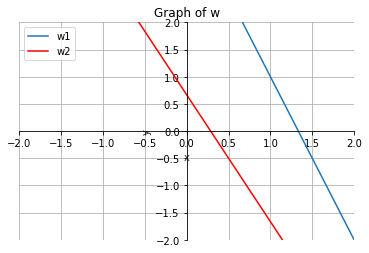

In [7]:
# 직선 2개 그려서 비교해보기

import numpy as np
a = [ [-1, 0, 0], [-1, 1, 0], [-1, 0, 1], [-1, 1, 1] ] 
b = [ [0.3], [0.4], [0.1] ] 
b2 = [[0.2], [0.7], [0.3]]

x = np.array(a)
w = np.array(b)
w2 = np.array(b2)

def predict(x, w):
    a = np.sum(x*w.T)
    return step_function(a)

def step_function(x):
    y = np.array(x>0)
    return y.astype(np.int)

target = np.array( [ [0], [0], [0], [1] ] )

while True:
    sum1 = 0
    for i in range(4):
        cost = target[i] - predict( x[i], w )
        if cost != 0:
            w = w + np.array([0.05*x[i]*cost]).T
        elif cost == 0:
            continue
        sum1+=cost
    if sum1 == 0:
        break

        
# 분류하는 직선의 방정식 그래프로 그리는 부분

import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-2,2,50) # -2에서 2까지 50등분해서 numpy 형태로 나타냄.
print(x)

y = -(x*w[1]/w[2]) + (w[0]/w[2]) #최종 가중치의 직선의 방정식
y2 = -(x*w2[1]/w2[2]) + (w2[0]/w2[2])

fig = plt.figure() # 그림그리는 바탕을 fig로 만들겠다.
ax = fig.add_subplot(1, 1, 1)  #(2,2,2) 로 바꾸어서 해본다.
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none') # right 부분의 선을 없애버림
ax.spines['top'].set_color('none') # top 부분의 선을 없애버림
ax.xaxis.set_ticks_position('bottom') # bottom 부분의 눈금을 없앰.
ax.yaxis.set_ticks_position('left') # left 부분의 눈금을 없앰.
plt.plot(x, y, label='w1')
plt.plot(x, y2, label='w2', color = 'Red')
plt.xlim(-2, 2) # x축의 눈금숫자의 시작과 마지막
plt.ylim(-2, 2) # y축의 눈금숫자의 시작과 마지막
plt.title('Graph of w') # 제목
plt.xlabel('x', color='#1C2833') # x축의 라벨 색깔
plt.ylabel('y', color='#1C2833') # y축의 라벨 색깔
plt.legend(loc='upper left') # 레전드가 위에 왼쪽에 나오게 하라
plt.grid() # 격자 모양 출력
plt.show() # 결과 보여줘

## 문제24. or 게이트를 분류하는 직선 그래프를 그리시오!

[-2.         -1.91836735 -1.83673469 -1.75510204 -1.67346939 -1.59183673
 -1.51020408 -1.42857143 -1.34693878 -1.26530612 -1.18367347 -1.10204082
 -1.02040816 -0.93877551 -0.85714286 -0.7755102  -0.69387755 -0.6122449
 -0.53061224 -0.44897959 -0.36734694 -0.28571429 -0.20408163 -0.12244898
 -0.04081633  0.04081633  0.12244898  0.20408163  0.28571429  0.36734694
  0.44897959  0.53061224  0.6122449   0.69387755  0.7755102   0.85714286
  0.93877551  1.02040816  1.10204082  1.18367347  1.26530612  1.34693878
  1.42857143  1.51020408  1.59183673  1.67346939  1.75510204  1.83673469
  1.91836735  2.        ]


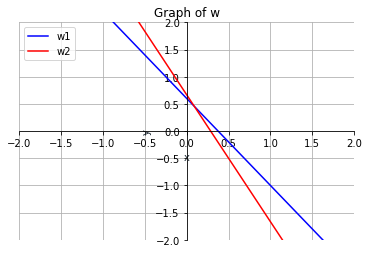

In [101]:
# 직선 2개 그려서 비교해보기
# target 값만 슬그머니 바꾸어 주면됨.

import numpy as np
a = [ [-1, 0, 0], [-1, 1, 0], [-1, 0, 1], [-1, 1, 1] ] 
b = [ [0.3], [0.4], [0.1] ] 
b2 = [[0.2], [0.7], [0.3]]
target = np.array( [ [0], [1], [1], [1] ] )

x = np.array(a)
w = np.array(b)
w2 = np.array(b2)

def predict(x, w):
    a = np.sum( x*w.T)
    return step_function(a)

def step_function(x):
    y = np.array(x>0)
    return y.astype(np.int)

while True:
    sum1 = 0
    for i in range(4):
        cost = target[i] - predict( x[i], w )
        if cost != 0:
            w = w + np.array([0.05*x[i]*cost]).T
        elif cost == 0:
            continue
        sum1+=cost
    if sum1 == 0:
        break

        
# 분류하는 직선의 방정식 그래프로 그리는 부분
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-2,2,50) # -2에서 2까지 50등분 한 값들을 numpy array형태로 나타내줌.
print(x)

y = -(x*w[1]/w[2]) + (w[0]/w[2]) #최종 가중치의 직선의 방정식
y2 = -(x*w2[1]/w2[2]) + (w2[0]/w2[2])


fig = plt.figure() # 그림그리는 바탕을 fig로 만들겠다.
ax = fig.add_subplot(1, 1, 1)  #(2,2,2) 로 바꾸어서 해본다.
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none') # right 부분의 선을 없애버림
ax.spines['top'].set_color('none') # top 부분의 선을 없애버림
ax.xaxis.set_ticks_position('bottom') # bottom 부분의 눈금을 없앰.
ax.yaxis.set_ticks_position('left') # left 부분의 눈금을 없앰.
plt.plot(x, y, label='w1')
plt.plot(x, y2, label='w2', color = 'Red')
plt.xlim(-2, 2) # x축의 눈금숫자의 시작과 마지막
plt.ylim(-2, 2) # y축의 눈금숫자의 시작과 마지막
plt.title('Graph of w') # 제목
plt.xlabel('x', color='#1C2833') # x축의 라벨 색깔
plt.ylabel('y', color='#1C2833') # y축의 라벨 색깔
plt.legend(loc='upper left') # 레전드가 위에 왼쪽에 나오게 하라
plt.grid() # 격자 모양 출력
plt.show() # 결과 보여줘

## 문제25. not and(NAND) 게이트를 분류하는 직선 그래프를 그리시오.

[-2.         -1.91836735 -1.83673469 -1.75510204 -1.67346939 -1.59183673
 -1.51020408 -1.42857143 -1.34693878 -1.26530612 -1.18367347 -1.10204082
 -1.02040816 -0.93877551 -0.85714286 -0.7755102  -0.69387755 -0.6122449
 -0.53061224 -0.44897959 -0.36734694 -0.28571429 -0.20408163 -0.12244898
 -0.04081633  0.04081633  0.12244898  0.20408163  0.28571429  0.36734694
  0.44897959  0.53061224  0.6122449   0.69387755  0.7755102   0.85714286
  0.93877551  1.02040816  1.10204082  1.18367347  1.26530612  1.34693878
  1.42857143  1.51020408  1.59183673  1.67346939  1.75510204  1.83673469
  1.91836735  2.        ]


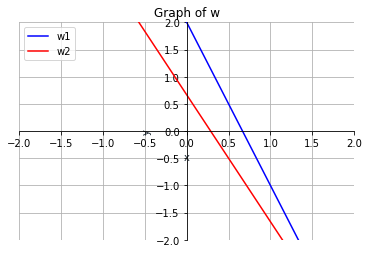

In [103]:
# 직선 2개 그려서 비교해보기
# target 값만 슬그머니 바꾸어 주면됨.

import numpy as np
a = [ [-1, 0, 0], [-1, 1, 0], [-1, 0, 1], [-1, 1, 1] ] 
b = [ [0.3], [0.4], [0.1] ] 
b2 = [[0.2], [0.7], [0.3]]

x = np.array(a)
w = np.array(b)
w2 = np.array(b2)

def predict(x, w):
    a = np.sum( x*w.T)
    return step_function(a)

def step_function(x):
    y = np.array(x>0)
    return y.astype(np.int)

target = np.array( [ [1], [1], [1], [0] ] )

while True:
    sum1 = 0
    for i in range(4):
        cost = target[i] - predict( x[i], w )
        if cost != 0:
            w = w + np.array([0.05*x[i]*cost]).T
        elif cost == 0:
            continue
        sum1+=cost
    if sum1 == 0:
        break

# 분류하는 직선의 방정식 그래프로 그리는 부분
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-2,2,50) # 시작점 -2부터 끝점 2까지 50등분해서 나타냄.
print(x)

y = -(x*w[1]/w[2]) + (w[0]/w[2]) #최종 가중치의 직선의 방정식
y2 = -(x*w2[1]/w2[2]) + (w2[0]/w2[2])

fig = plt.figure() # 그림그리는 바탕을 fig로 만들겠다.
ax = fig.add_subplot(1, 1, 1)  #(2,2,2) 로 바꾸어서 해본다.

# Moving spines
# x / y 축을 가운데로 옮기는 것
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none') # right 부분의 선을 없애버림
ax.spines['top'].set_color('none') # top 부분의 선을 없애버림
ax.xaxis.set_ticks_position('bottom') # bottom 부분의 눈금을 없앰.
ax.yaxis.set_ticks_position('left') # left 부분의 눈금을 없앰.

plt.plot(x, y, label='w1')
plt.plot(x, y2, label='w2', color = 'Red')

plt.xlim(-2, 2) # x축의 눈금숫자의 시작과 마지막
plt.ylim(-2, 2) # y축의 눈금숫자의 시작과 마지막
plt.title('Graph of w') # 제목
plt.xlabel('x', color='#1C2833') # x축의 라벨 색깔
plt.ylabel('y', color='#1C2833') # y축의 라벨 색깔
plt.legend(loc='upper left') # 레전드가 위에 왼쪽에 나오게 하라.(왼쪽모서리 사각형)
plt.grid() # 격자 모양 출력
plt.show() # 결과 보여줘